### Sobre datas no Python

#### Um pouco sobre funções e bibliotecas de datas no Python

In [1]:
from datetime import datetime
#datetime cria data passando params na seguinte ontem (y, m, d)
dt = datetime(year=2019, month=7, day=7)
dt

datetime.datetime(2019, 7, 7, 0, 0)

In [2]:
# parser é usado para transformar string em data e hora
from dateutil import parser
date = parser.parse('26 of October, 2023')

date

datetime.datetime(2023, 10, 26, 0, 0)

In [3]:
import pandas as pd
#parse_date[0] -> doluna 0 deve ser lida como data
#index_col = coluna 0 sera o index 
df = pd.read_csv('female_birth.csv', parse_dates=[0], index_col=0)

In [4]:
df.rename(columns={
          'Daily total female births in California, 1959': 'Number of Births'}, inplace=True)

In [5]:
df = df.iloc[(df.index != 'Daily total female births in California')]

In [6]:
df

,Number of Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [7]:
# vale a pena transformar um dataframe em uma série quando se faz analise de séries temporais, não que não possa ser feito por DF
# para isso usamos o df.squeeze('columns')
df = df.squeeze('columns')

In [8]:
def dateparse(dates): return pd.to_datetime(dates, format="%Y-%m")
#date_parser aplica a função para mudar o formato da coluna indicada como data pelo parse_dates
airpass = pd.read_csv('AirPassengers.csv', parse_dates=[
                      'Month'], date_parser=dateparse, index_col ='Month')

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_28496\3532105288.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  airpass = pd.read_csv('AirPassengers.csv', parse_dates=[


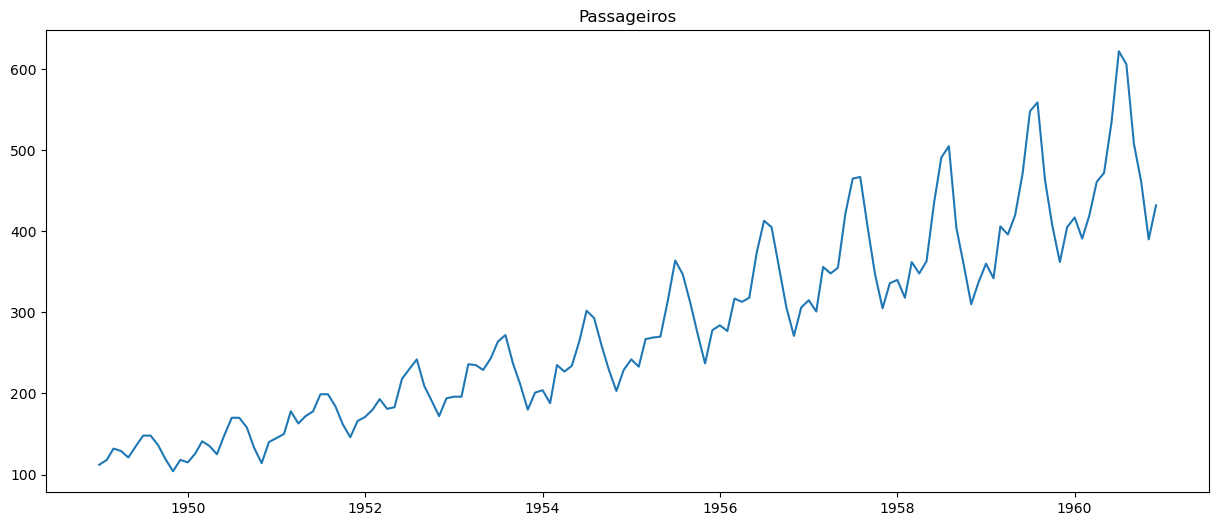

In [9]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 6


register_matplotlib_converters()  # sempre usar quando for imprimir datas no plot
plt.plot(airpass)
plt.title('Passageiros')
plt.show()